# <center><font color='violet'>Mental Health Depression Disorder Analysis </font></center>

## <font color='blue'>Introduction</font>

<p>The Mental Health Depression Disorder dataset provides comprehensive information on the prevalence of various mental health disorders across different countries over multiple years. This dataset includes data on schizophrenia, bipolar disorder, eating disorders, anxiety disorders, drug use disorders, depression, and alcohol use disorders. It is a valuable resource for analyzing trends in mental health disorders and understanding the global burden of mental illness.</p>

## <font color='blue'>Dataset's sheets explaination</font>

<b>1.</b>The "Depression by Level of Education" dataset provides detailed information on the prevalence of depression among different educational attainment levels across various countries for specific years. <br>
<b>2.</b>The "Number with Depression by Count" dataset provides information on the number of people suffering from depressive disorders in various countries over multiple years.<br>
<b>3.</b>The "Prevalence by Mental and Substance Disorders" dataset provides detailed information on the prevalence of various mental health and substance use disorders across different countries and years. <br>
<b>4.</b>The "Prevalence of Depression by Age" dataset provides detailed information on the prevalence of depression across various age groups in different countries and years. <br>
<b>5.</b>The "Prevalence of Depression by Gender" dataset provides information on the prevalence of depression among males and females across different countries and years.<br>
<b>6.</b>The "Suicide Rates vs Prevalence of Depressive Disorders" dataset provides information on the relationship between suicide rates and the prevalence of depressive disorders across different countries and years. 


## <font color='blue'>Project implementation</font>

## 1.Importation of libraries


In [21]:
import pandas as pd #manipulation de données
import matplotlib.pyplot as plt # visualisation de données"
import numpy as np

## 2.Load and read dataset

In [2]:
data=pd.ExcelFile('/kaggle/input/mental-health-depression-disorder-data/Mental health Depression disorder Data.xlsx')


In [3]:
#show sheets included in data
data.sheet_names

['prevalence-by-mental-and-substa',
 'depression-by-level-of-educatio',
 'prevalence-of-depression-by-age',
 'prevalence-of-depression-males-',
 'suicide-rates-vs-prevalence-of-',
 'number-with-depression-by-count']

In [4]:
#organization of Data sheets
Mental_health_disorder=data.parse('prevalence-by-mental-and-substa')
depression_vs_levelEdu=data.parse('depression-by-level-of-educatio')
depression_vs_age=data.parse('prevalence-of-depression-by-age')
depression_vs_gender=data.parse('prevalence-of-depression-males-')
suicide_vs_mentalHealth=data.parse('suicide-rates-vs-prevalence-of-')
count_depression=data.parse('number-with-depression-by-count')

#### **Objectifs**:
<br>
-Understanding of some countries 's  disordres evolution  over time.<br>
-The difference in disorders pourcentages from country to other<br>
-the country which suffers more mental health disorders <br>
-Which Mental Health take the higher pourcentage of people who suffering this disorder<br>
-Do the disorders  affecte each other?



In [5]:
# show first rows of prevalence of various mental health  disorders across different countries and years
Mental_health_disorder.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [6]:
#verify missing values
Mental_health_disorder.isnull().sum()

Entity                         0
Code                         980
Year                           0
Schizophrenia (%)              0
Bipolar disorder (%)           0
Eating disorders (%)           0
Anxiety disorders (%)          0
Drug use disorders (%)         0
Depression (%)                 0
Alcohol use disorders (%)      0
dtype: int64

As we aren't very intrested by code column,we can delete it

In [7]:
#remove code column
Mental_health_disorder=Mental_health_disorder.drop('Code',axis=1)

In [8]:
#verify duplicated rows
print("The number of duplicated is ",Mental_health_disorder.duplicated().sum())

The number of duplicated is  0


In [9]:
# summarize disorders calculate for each country
m=Mental_health_disorder.drop('Year',axis=1)
data=m.groupby(by="Entity").mean()
#reindex data
X=data.index
data.head()


,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
Entity,,,,,,,
Afghanistan,0.162974,0.702354,0.094261,4.848102,2.120798,4.118622,0.663151
Albania,0.196544,0.700092,0.145230,3.368903,0.498765,2.190442,1.746757
Algeria,0.194960,0.809903,0.194488,5.011396,1.540640,3.657743,0.653712
American Samoa,0.249785,0.467095,0.181259,3.293312,0.759355,2.940850,1.135266
Andean Latin America,0.197425,0.876089,0.316283,4.245343,0.647127,2.626773,1.646372


### Which country has the higher/lower pourcent of disorders?

In [10]:
l = {}
for i in data.index:  #iterate countries
    s = data.loc[i].sum()  # calculate cumulative disorders percent for each country
    l[i] =round(s,2)        # create a dictionary
#create dataframe to reduce complexity      
df=pd.DataFrame({"country":l.keys(),"cumulative disorders":l.values()})
df=df.sort_values(by="cumulative disorders",ascending=False)
df1=df.sort_values(by="cumulative disorders")

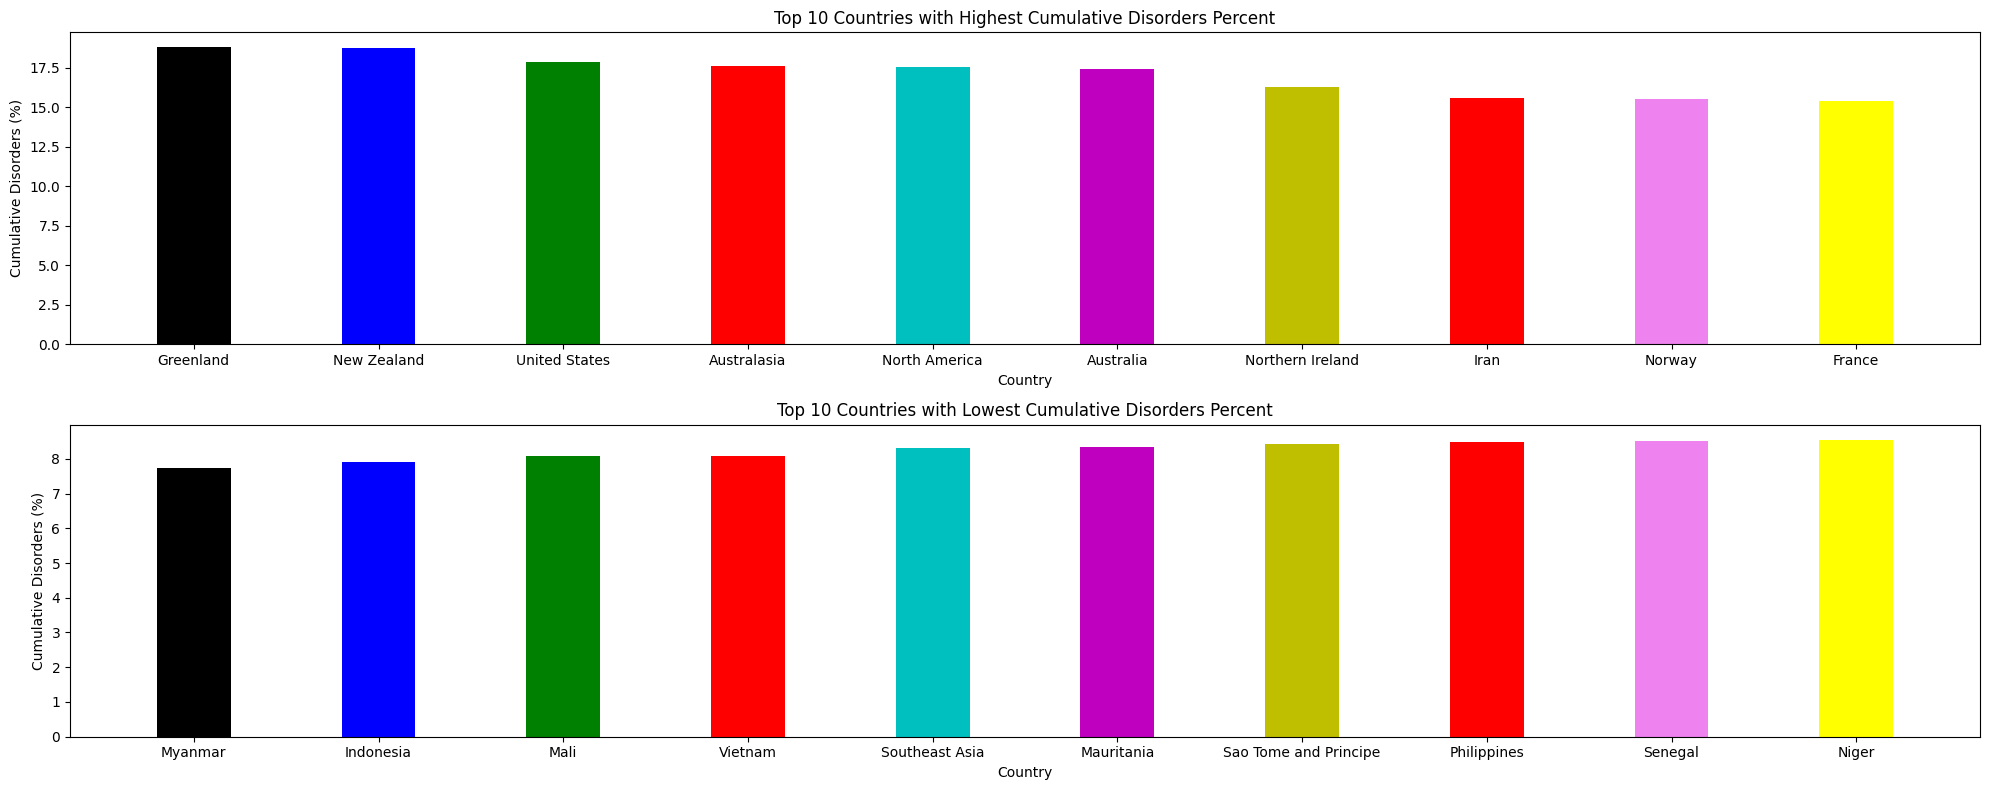

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(20, 8))  # Adjusted the figsize for better visibility

# Plot for the top 10 countries with the highest cumulative disorders
colors=['k','b', 'g', 'r', 'c', 'm', 'y','r','violet','yellow'] 
axes[0].bar(df["country"][0:10], df["cumulative disorders"][0:10], color=colors, width=0.4)
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Cumulative Disorders (%)")
axes[0].set_title("Top 10 Countries with Highest Cumulative Disorders Percent")

# Plot for the top 10 countries with the lowest cumulative disorders
axes[1].bar(df1["country"][0:10], df1["cumulative disorders"][0:10], color=colors, width=0.4)
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Cumulative Disorders (%)")
axes[1].set_title("Top 10 Countries with Lowest Cumulative Disorders Percent")

plt.tight_layout()  # This will ensure that the plots don't overlap
plt.show()


### Evolution of disorders over time in(Greenland,New Zealand,Myanmar,Indonesia)

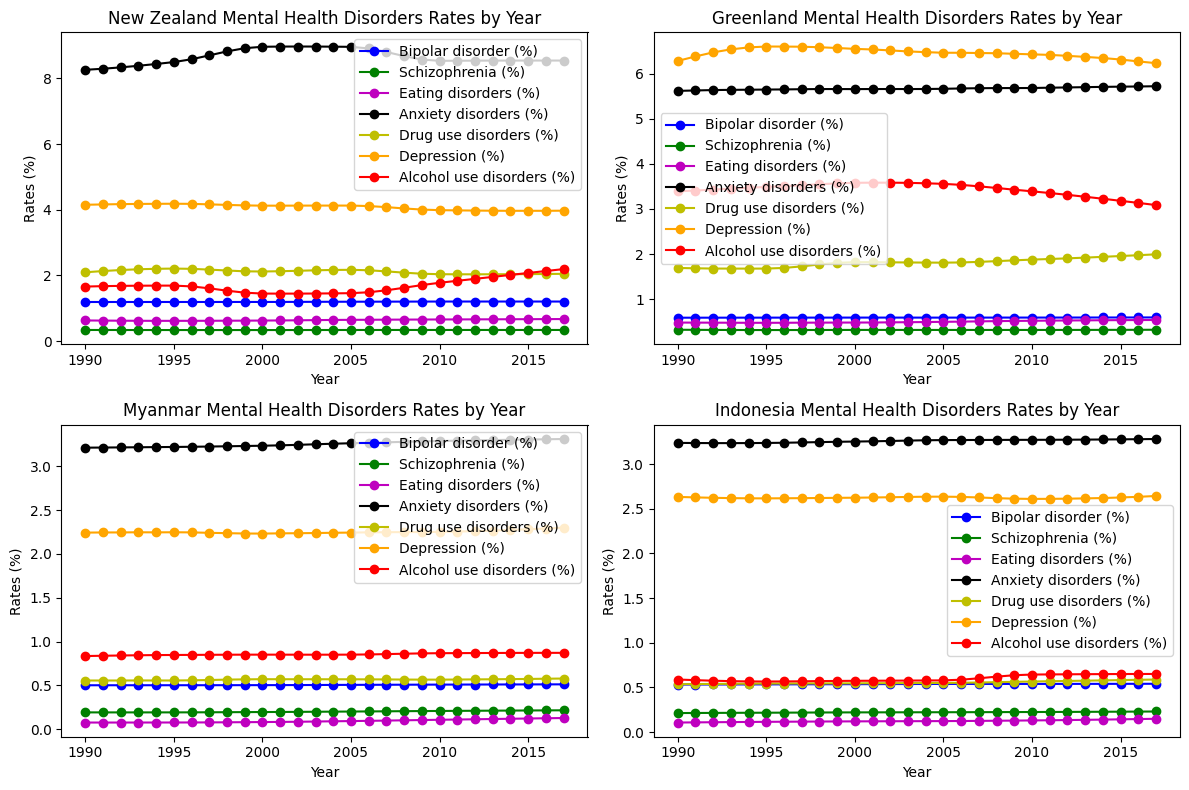

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Liste des pays et des couleurs
countries = ['New Zealand', 'Greenland', 'Myanmar', 'Indonesia']
disorders = ['Bipolar disorder (%)', 'Schizophrenia (%)', 'Eating disorders (%)', 
             'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 
             'Alcohol use disorders (%)']  # Différents troubles mentaux
colors = ['b', 'g', 'm', 'k', 'y', 'orange', 'red']  # Palette de couleurs

# Création de la figure et des sous-graphiques (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
k = 0

for i in range(2):
    for j in range(2):
        # Vérifier que k ne dépasse pas la taille de la liste des pays
        if k >= len(countries):
            break
        
        country = countries[k]
        # Filtrer les données pour le pays courant
        country_data = Mental_health_disorder[Mental_health_disorder['Entity'] == country]
        
        # Tracer chaque trouble mental avec une couleur différente
        for disorder, color in zip(disorders, colors):
            axes[i, j].plot(country_data['Year'], country_data[disorder], 
                            marker='o', linestyle='-', color=color, label=disorder)

        # Ajouter les étiquettes et le titre
        axes[i, j].set_xlabel('Year')
        axes[i, j].set_ylabel('Rates (%)')
        axes[i, j].set_title(f'{country} Mental Health Disorders Rates by Year')
        axes[i, j].legend()  # Ajouter la légende pour différencier les troubles
        
        k += 1  # Incrémenter le compteur des pays

plt.tight_layout()  # Ajuster l'espacement des sous-graphes
plt.show()


Greenland tops the list of countries with the highest percentage of mental health disorders, due to the high rate of anxiety, which is nearly 6%, and depression, which exceeds 6%. Additionally, alcohol use disorders have a significant percentage, reaching almost 4.7%. However, other selected disorders in the data do not surpass 2%. Over time, there seems to be a downward trend in depression and alcohol disorders, bringing them closer to 3%, while other disorders remain stable, which may indicate increased awareness of mental health in the population. There is, however, a slight upward trend in drug use disorders.<br>

A similar situation is observed in New Zealand, the second country with the highest percentage of disorders. Anxiety rates exceed 8%, depression is nearly 4%, and there is a rising trend in alcohol use disorders, while other mental health issues remain stable.<br>

In contrast, Myanmar and Indonesia, which have the lowest cumulative disorder rates in the data, show stability in most disorders, with values not exceeding 1%. Anxiety disorders do not surpass 4%, and depression remains under 3%. Anxiety appears to be the most prevalent issue, which may be explained by daily needs, lifestyle factors, and other socioeconomic conditions.<br>

## Which 20 country has the higher percent in Depression,Drug ,Alcohol  and Anxiety disorders ?

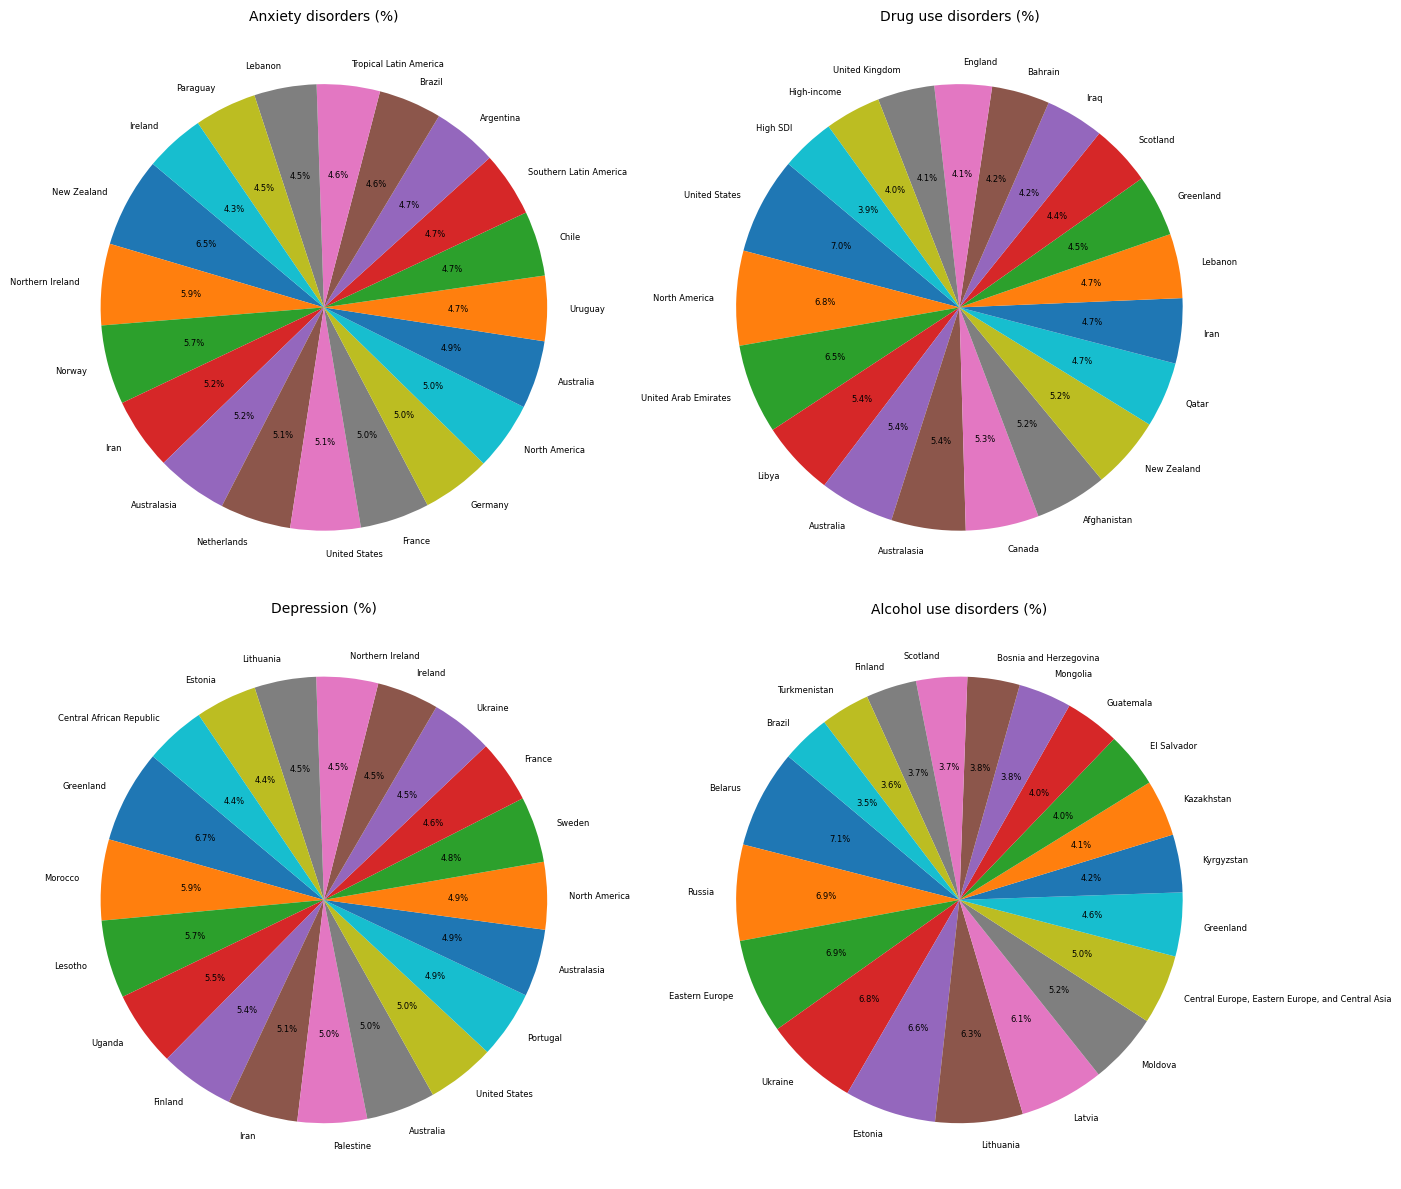

In [13]:
# Disorders to plot
disorders = ['Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Adjust figsize for better visibility
axes = axes.flatten()  # Flatten to make it easier to index

for idx, disorder in enumerate(disorders):
    R = data[disorder]
    R = R.sort_values(ascending=False)  # Sort in descending order
    R = R.head(20)  # Take the top 50 values

    # Plot pie chart for the current disorder
    axes[idx].pie(R, autopct='%1.1f%%',labels=R.index, startangle=140, textprops={'fontsize': 6})
    axes[idx].set_title(disorder, fontsize=10)  # Title for each pie chart

# Adjust layout
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()  # Ensure the plots don't overlap
plt.show()

 ### Do women or men suffer more from depression?


### <font color="Aqua">ensure data quality</font>

In [14]:
#verify missing values
depression_vs_gender.isnull().sum()


Entity                           0
Code                          1726
Year                             0
Prevalence in males (%)      41339
Prevalence in females (%)    41339
Population                     924
dtype: int64

In [15]:
#Drop rows with missing values missing values
depression_vs_gender=depression_vs_gender.dropna()


In [16]:
#verify duplicated rows
depression_vs_gender.duplicated().sum()

0

In [17]:
#show first rows
depression_vs_gender.head()

,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
190,Afghanistan,AFG,1990,3.499982,4.647815,12412000.0
191,Afghanistan,AFG,1991,3.503947,4.655772,13299000.0
192,Afghanistan,AFG,1992,3.508912,4.662066,14486000.0
193,Afghanistan,AFG,1993,3.513429,4.669012,15817000.0
194,Afghanistan,AFG,1994,3.515578,4.673050,17076000.0


In [18]:
### summarize disorders calculate for each country
depression_vs_gender=depression_vs_gender.drop(['Code','Year'],axis=1)
depression_vs_gender=depression_vs_gender.groupby(by="Entity").mean()


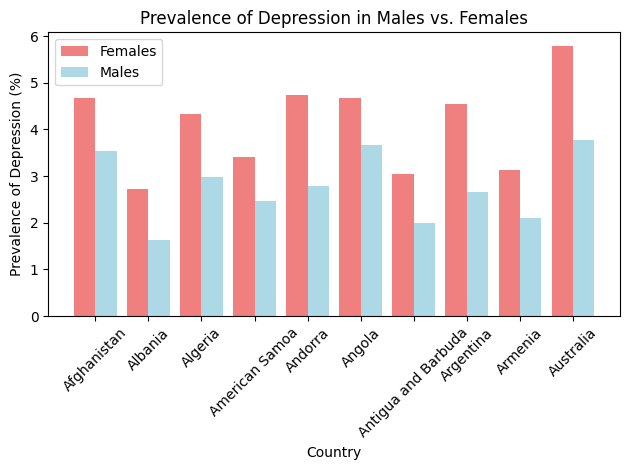

In [27]:


# Select the first 10 countries from the grouped data
D = depression_vs_gender.iloc[0:10]

# Create an array of positions for the X-axis
X_axis = np.arange(len(D))

plt.bar(X_axis - 0.2, D['Prevalence in females (%)'], 0.4, label='Females', color='lightcoral') 
plt.bar(X_axis + 0.2, D['Prevalence in males (%)'], 0.4, label='Males', color='lightblue')

# Set the labels and ticks for the X-axis
plt.xticks(X_axis, D.index, rotation=45)

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Prevalence of Depression (%)")
plt.title("Prevalence of Depression in Males vs. Females")

# Add a legend to indicate which bars represent males and females
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the layout to avoid clipping


 #### For the 10 example countries, women have a higher percentage of depression than men.

### Which age group is more affected by depression?

### **Preparation of data**

In [29]:
#verify missing values
depression_vs_age.isnull().sum()

Entity                    0
Code                    980
Year                      0
20-24 years old (%)       0
10-14 years old (%)       0
All ages (%)              0
70+ years old (%)         0
30-34 years old (%)       0
15-19 years old (%)       0
25-29 years old (%)       0
50-69 years old (%)       0
Age-standardized (%)      0
15-49 years old (%)       0
dtype: int64

In [31]:
# remove Year and Code for simplecity of data
depression_vs_age=depression_vs_age.drop(['Code','Year'],axis=1)

In [34]:
#verify duplicated data
depression_vs_age.duplicated().sum()

0

In [38]:
# group data by countries
depression_vs_age=depression_vs_age.groupby(by="Entity").mean()
depression_vs_age.head()

,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
Entity,,,,,,,,,,
Afghanistan,4.420080,1.584523,2.963242,5.196125,5.800030,3.420800,5.136104,6.025950,4.118622,5.029453
Albania,2.487349,0.893179,2.243776,4.426036,2.437914,2.020161,2.450240,3.574977,2.190442,2.467109
Algeria,3.873317,1.719097,3.354177,4.919909,4.699310,3.376295,4.298704,5.462192,3.657743,4.397917
American Samoa,2.949234,1.076317,2.506846,5.799234,2.980908,2.480790,2.896331,5.393953,2.940850,3.131773
Andean Latin America,2.915244,1.006207,2.362149,4.786563,3.008019,2.325373,2.971061,4.462988,2.626773,2.960885


### Analysis The Age and Depression's relation

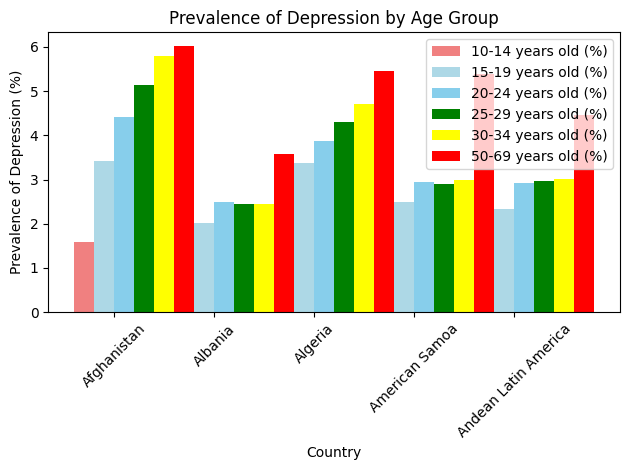

In [43]:
# Select the first 2 countries from the grouped data
ages3 = depression_vs_age.iloc[0:5]
#ages3=depression_vs_age[depression_vs_age.index=="Morocco"]
# Create an array of positions for the X-axis
X_axis = range(len(ages3))

# Plot the bars, adjusting their width to avoid overlap
plt.bar([x - 0.3 for x in X_axis], ages3['10-14 years old (%)'], 0.2, label='10-14 years old (%)', color='lightcoral') 
plt.bar([x - 0.1 for x in X_axis], ages3['15-19 years old (%)'], 0.2, label='15-19 years old (%)', color='lightblue')
plt.bar([x + 0.1 for x in X_axis], ages3['20-24 years old (%)'], 0.2, label='20-24 years old (%)', color='skyblue')
plt.bar([x + 0.3 for x in X_axis], ages3['25-29 years old (%)'], 0.2, label='25-29 years old (%)', color='green')
plt.bar([x + 0.5 for x in X_axis], ages3['30-34 years old (%)'], 0.2, label='30-34 years old (%)', color='yellow')
plt.bar([x + 0.7 for x in X_axis], ages3['50-69 years old (%)'], 0.2, label='50-69 years old (%)', color='red')

# Set the labels and ticks for the X-axis
plt.xticks(X_axis, ages3.index, rotation=45)

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Prevalence of Depression (%)")
plt.title("Prevalence of Depression by Age Group")

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the layout to avoid clipping
plt.show()


### <font color="crimson">there is any relation between different disorders?</font>

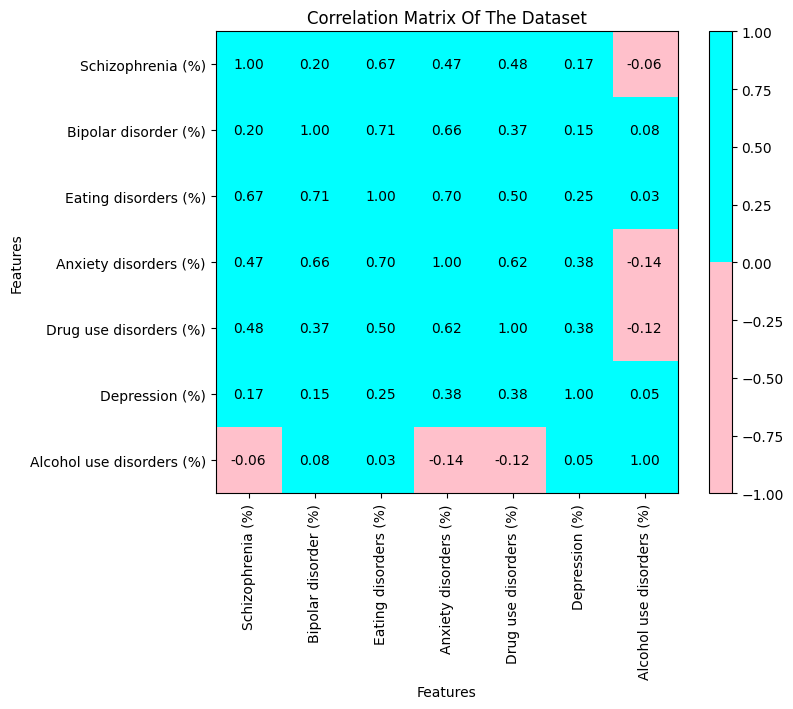

In [56]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd



# Calculate correlation between columns
corr_matrix = data.corr()

# Create a custom color map with blue and green colors
colors_list = ['pink', 'aqua']
cmap = mcolors.ListedColormap(colors_list)

# Plot the heatmap with custom colors and annotations
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.imshow(corr_matrix, cmap=cmap, vmin=-1, vmax=1)  # Use -1 to 1 range for correlation

# Annotate each cell with the numeric value
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.annotate(f'{corr_matrix.values[i][j]:.2f}',
                     xy=(j, i),
                     ha='center', va='center', color='black')

# Set plot title and axis labels
plt.title("Correlation Matrix Of The Dataset")
plt.xlabel("Features")
plt.ylabel("Features")

# Set tick labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Display the heatmap
plt.colorbar()  # Optional: Adds a color bar to show the color mapping
plt.show()


 The heatmap shows that eating disorders have a significant relationship with some disorders like anxiety, bipolar disorder, and schizophrenia. However, alcohol use exhibits a reverse relationship with anxiety and schizophrenia, which could suggest that alcohol consumption might be associated with a small reduction in the prevalence of these disorders, providing temporary relief or comfort to some individuals